# KNN Regression

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

## Import libraries

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from math import sqrt

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor


# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Files
from util import fetchOnlineData, create_dataset
from indicators import get_indicators

# TA Library (https://github.com/bukosabino/ta)
from ta import *

sns.set(font_scale = 1.5)

## Initial variables

In [2]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

# Compute indicators from TA library

## Import dataset

In [3]:
yesterday = dt.date.today() - dt.timedelta(1)
portf_value = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
df = add_all_ta_features(portf_value, "Open", "High", "Low", "Close", "Volume", fillna=True)

/home/emi/miniconda3/envs/factors/lib/python3.6/site-packages/ta/trend.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/emi/miniconda3/envs/factors/lib/python3.6/site-packages/ta/trend.py:174: RuntimeWarning:

invalid value encountered in double_scalars

/home/emi/miniconda3/envs/factors/lib/python3.6/site-packages/ta/trend.py:634: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning

/home/emi/miniconda3/envs/factors/lib/python3.6/site-packages/ta/trend.py:656: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning



## Changing index and columns

In [5]:
# Delete unuseful columns
del df['Open']
del df['High']
del df['Low']
del df['Close']
del df['Volume']


# Create 'date' column for posterior index
df['date'] = df.index

# Rename column for correlation matrix. Can't have spaces.
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

# Reset index
df.reset_index(inplace=True)

## Correlation matrix

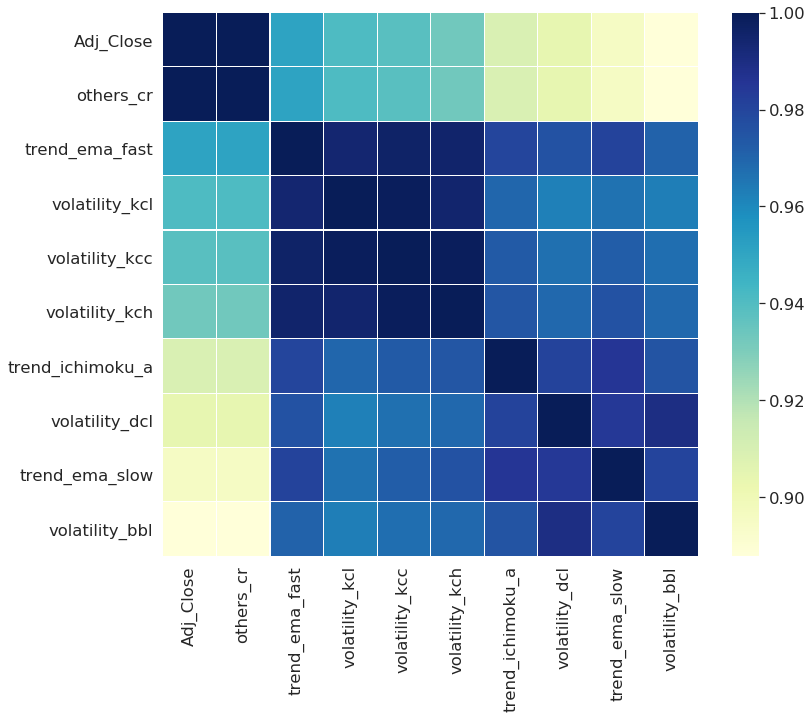

In [6]:
# Adj Close correlation matrix
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Adj_Close')['Adj_Close'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 
plt.show()

## Indicators to use

* others_cr: Cumulative Return.
* trend_ema_fast: Fast Exponential Moving Averages (EMA) 
* volatility_kcl: Keltner Channel

### Create a dataframe with indicators to use

In [112]:
dataset = df[['Adj_Close', 'others_cr', 'trend_ema_fast', 'volatility_kcl']].copy()

## Setup the Target variable or the desired output.

In [113]:
# Define X and y
feature_cols = ['others_cr', 'trend_ema_fast', 'volatility_kcl']
X = dataset[feature_cols]
y = dataset['Adj_Close']

## Split the data

In [120]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

## Feature Scaling

In [122]:
# Scale the dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

## Have a look at the error rate for different k values

In [140]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train_scaled)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_scaled,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

ValueError: query data dimension must match training data dimension

## Plot RMSE values

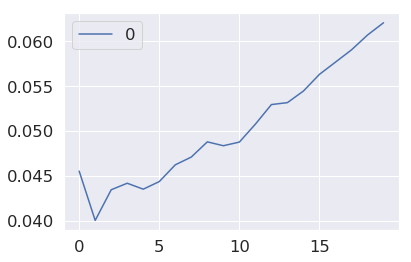

In [124]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Implement GridsearchCV 

In [132]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled, y_train_scaled)
model.best_params_

{'n_neighbors': 2}

## Prediction

In [133]:
y_pred = model.predict(X_test_scaled)  

## Compute the rmse

In [135]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 63.658427


## Plotting

### Standarize data 

In [136]:
preds = scaler.inverse_transform([y_pred])


ValueError: Found array with dim 3. Estimator expected <= 2.

In [138]:
y_pred, y_test_scaled

(array([[0.27712498],
        [0.42655681],
        [0.36055612],
        [0.33725033],
        [0.21445351],
        [0.28221699],
        [0.34939281],
        [0.44398742],
        [0.42675272],
        [0.31688211],
        [0.26870344],
        [0.34155887],
        [0.36741081],
        [0.43732853],
        [0.44927542],
        [0.46455155],
        [0.45945946],
        [0.52663533],
        [0.59028578],
        [0.49255781],
        [0.44555411],
        [0.41793962],
        [0.37269878],
        [0.39071676],
        [0.39071676],
        [0.39071676],
        [0.3292205 ],
        [0.2810418 ],
        [0.21445351],
        [0.12279664],
        [0.0916568 ],
        [0.0916568 ],
        [0.10458277],
        [0.13298073],
        [0.14198974],
        [0.14198974],
        [0.14198974],
        [0.12945539],
        [0.02134736],
        [0.17508804],
        [0.21406184],
        [0.22326671],
        [0.22267919],
        [0.2224833 ],
        [0.31844878],
        [0

In [42]:
# Convert array to series
mylist = preds.tolist()
se = pd.Series(mylist)


In [32]:
# Create a dataframe for plotting
predictions = pd.DataFrame()
predictions['Price'] = y_test
predictions['Forecast'] = se[0]

In [37]:
predictions

,Price,Forecast
223,60.292001,1365.819005
137,64.734334,1453.241174
205,59.310999,1303.448246
236,65.748000,1496.990797
72,78.084334,1750.098126
109,71.701667,1596.682334
120,68.108334,1525.359453
116,69.720666,1525.132395
222,59.494667,1364.643762
95,72.855334,1623.890032


In [32]:
# Create dates df index
df1 = df['date'].tail(len(y_test))

In [32]:
# Concatenate both dataframes
pred = pd.concat([predictions, df1], axis=1)

# Set index
pred.set_index('date', inplace=True)

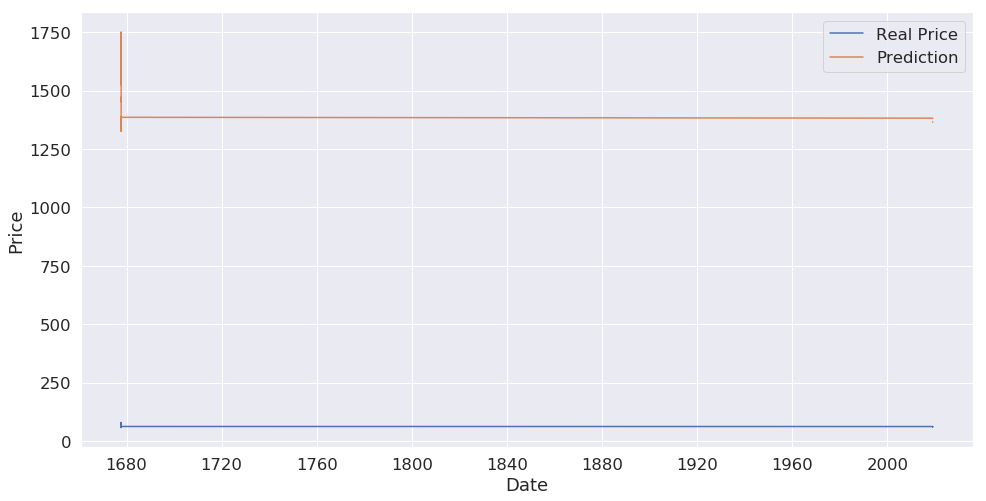

In [33]:
plt.figure(figsize=(16,8))
plt.plot(pred)
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend(["Real Price", "Prediction"])
plt.show()

In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

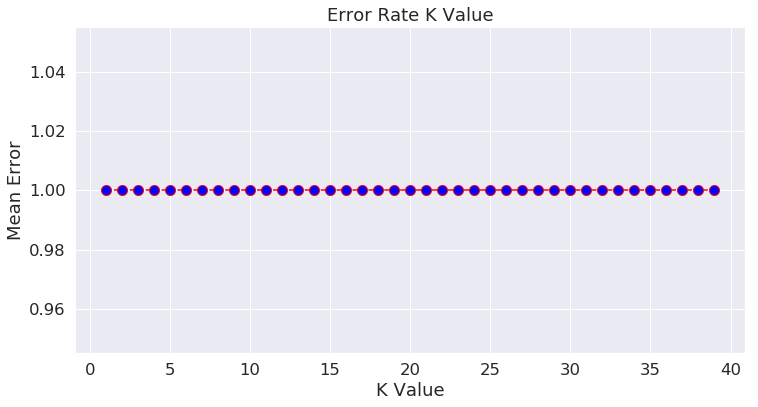

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
